In [ ]:
#!pip install pycaret
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.4/501.4 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
#from pycaret.regression import *
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
local_path = '/content/gdrive/MyDrive/Colab Notebooks/AI_ML/'

Mounted at /content/gdrive


In [3]:
csv = [
    'Dec_20_2022.csv', 'Dec_21_2022.csv', 'Dec_21_2022_2.csv', 'Dec_22_2022.csv',
    'Dec_23_2022.csv', 'Dec_24_2022.csv', 'Dec_30_2022.csv', 'Jan_01_2023.csv', 
    'Jan_02_2023.csv', 'Jan_03_2023.csv', 'Jan_04_2023.csv',  'Jan_07_2023.csv', 
    'Jan_08_2023.csv', 'Jan_09_2023.csv', 'Jan_10_2023.csv', 'Jan_11_2023.csv',
    'Jan_12_2023.csv', 'Jan_13_2023.csv', 'Jan_14_2023.csv', 'Jan_15_2023.csv',
    'Jan_16_2023.csv', 'Jan_17_2023.csv', 'Jan_18_2023.csv', 'Jan_19_2023.csv',  
    'Jan_21_2023.csv', 'Jan_22_2023.csv', 'Jan_24_2023.csv', 'Jan_25_2023.csv',
    'Jan_26_2023.csv', 'Jan_27_2023.csv', 'Jan_29_2023.csv'
]


### Data Engineering: 
+ Shifting the data by 15 columns 
+ data collection every 4 seconds
+ 15*4=60 seconds == 1 minute forecast
+ concatenating all files into one big csv file used for training

In [4]:
train_data = pd.DataFrame()
rows = 15
for c in csv:
  if c == csv[0]:
    df = pd.read_csv(local_path + c)
    del df['Unnamed: 0']
    df=df.set_index('Time')
    df['Future_BTCUSDT'] = df['BTCUSDT'].shift(rows)
    train_data = df.tail(-rows)
  else: 
    df = pd.read_csv(local_path + c)
    del df['Unnamed: 0']
    df=df.set_index('Time')
    df['Future_BTCUSDT'] = df['BTCUSDT'].shift(rows)
    df = df.tail(-rows)
    train_data = train_data.append(df)



In [5]:
train_data

,BTCUSDT,Future_BTCUSDT
Time,,
2022-12-20 20:33:16.883893,16901.093646,16900.943150
2022-12-20 20:33:21.985811,16899.552314,16900.943150
2022-12-20 20:33:27.114126,16899.552314,16900.928241
2022-12-20 20:33:32.218467,16899.529399,16901.062385
2022-12-20 20:33:37.383350,16898.910397,16900.889006
...,...,...
2023-01-29 22:05:35.468673,23809.387326,23816.311926
2023-01-29 22:05:40.602699,23808.776048,23816.311926
2023-01-29 22:05:45.771837,23808.378973,23816.546038


In [ ]:
#from sklearn.model_selection import train_test_split

# Split the data into training and testing sets                           # random seed
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
df = pd.read_csv(local_path + csv[2]) # Dec_21_2022_2.csv
del df['Unnamed: 0']
df

,Time,BTCUSDT
0,2022-12-21 17:56:36.252292,16853.779701
1,2022-12-21 17:56:41.313742,16853.752940
2,2022-12-21 17:56:46.376983,16853.694191
3,2022-12-21 17:56:51.431242,16853.638847
4,2022-12-21 17:56:56.484519,16853.637717
...,...,...
1812,2022-12-21 20:42:28.183293,16806.985486
1813,2022-12-21 20:42:33.235873,16806.985485
1814,2022-12-21 20:42:38.290590,16808.391494
1815,2022-12-21 20:42:43.344146,16808.395604


In [15]:
#del df['Unnamed: 0']
df = df.set_index('Time')
df

,BTCUSDT
Time,
2022-12-21 17:56:36.252292,16853.779701
2022-12-21 17:56:41.313742,16853.752940
2022-12-21 17:56:46.376983,16853.694191
2022-12-21 17:56:51.431242,16853.638847
2022-12-21 17:56:56.484519,16853.637717
...,...
2022-12-21 20:42:28.183293,16806.985486
2022-12-21 20:42:33.235873,16806.985485
2022-12-21 20:42:38.290590,16808.391494


In [16]:
df['Future_BTCUSDT'] = df['BTCUSDT'].shift(5)
df

,BTCUSDT,Future_BTCUSDT
Time,,
2022-12-21 17:56:36.252292,16853.779701,NaN
2022-12-21 17:56:41.313742,16853.752940,NaN
2022-12-21 17:56:46.376983,16853.694191,NaN
2022-12-21 17:56:51.431242,16853.638847,NaN
2022-12-21 17:56:56.484519,16853.637717,NaN
...,...,...
2022-12-21 20:42:28.183293,16806.985486,16806.930923
2022-12-21 20:42:33.235873,16806.985485,16806.984766
2022-12-21 20:42:38.290590,16808.391494,16806.985487


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets                           # random seed
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# ~ 4.5 min runtime
target_col = 'Future_BTCUSDT'
# session_id for reproducability
setup(train_data, target = target_col, train_size = 0.90, session_id = 1)
setup_df = pull()
# ranking based on R-squared
best_model = compare_models()

,Description,Value
0,Session id,1
1,Target,Future_BTCUSDT
2,Target type,Regression
3,Data shape,"(54215, 2)"
4,Train data shape,"(48793, 2)"
5,Test data shape,"(5422, 2)"
6,Numeric features,1
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,1.4635,11.1412,3.3324,0.9994,0.0002,0.0001,0.1290
et,Extra Trees Regressor,1.4098,9.7093,3.1106,0.9994,0.0002,0.0001,2.4080
rf,Random Forest Regressor,1.6244,9.9110,3.1454,0.9994,0.0002,0.0001,6.0520
knn,K Neighbors Regressor,1.9562,11.4817,3.3858,0.9993,0.0002,0.0001,0.0510
gbr,Gradient Boosting Regressor,1.9866,11.7780,3.4296,0.9993,0.0002,0.0001,2.2010
lr,Linear Regression,1.9864,13.1506,3.6196,0.9992,0.0002,0.0001,0.4970
lasso,Lasso Regression,1.9864,13.1507,3.6197,0.9992,0.0002,0.0001,0.0570
ridge,Ridge Regression,1.9864,13.1506,3.6196,0.9992,0.0002,0.0001,0.0340
lar,Least Angle Regression,1.9864,13.1507,3.6197,0.9992,0.0002,0.0001,0.0330
en,Elastic Net,1.9864,13.1507,3.6197,0.9992,0.0002,0.0001,0.0370


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
model = create_model('lr')
model = finalize_model(model)
save_model(model, 'BTC_seconds_version_3')
!cp BTC_seconds_version_3.pkl "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTC_seconds_version_3.pkl"

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9778,12.4607,3.5300,0.9993,0.0002,0.0001
1,1.9341,11.3022,3.3619,0.9993,0.0002,0.0001
2,2.0309,16.7368,4.0911,0.9990,0.0002,0.0001
3,1.9935,13.8212,3.7177,0.9992,0.0002,0.0001
4,2.0090,14.5532,3.8149,0.9992,0.0002,0.0001
5,1.9941,11.8224,3.4384,0.9993,0.0002,0.0001
6,1.9624,13.1387,3.6247,0.9992,0.0002,0.0001
7,1.9196,10.8433,3.2929,0.9994,0.0002,0.0001
8,1.9924,13.3603,3.6552,0.9992,0.0002,0.0001


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


In [ ]:
data = pd.read_csv(local_path + csv[-1], index_col = 1, parse_dates=[1])
del data['Unnamed: 0']

prediction = predict_model(model, data=data)

label = prediction.pop('prediction_label')

prediction.insert(1, 'Predicted Price', label)

prediction.head(n=10)

,BTCUSDT,Predicted Price
0,16994.771484,16994.728516
1,16994.769531,16994.726562
2,16994.751953,16994.708984
3,16994.751953,16994.708984
4,16994.464844,16994.421875
5,16994.464844,16994.421875
6,16992.533203,16992.490234
7,16992.533203,16992.490234
8,16992.181641,16992.138672
9,16992.181641,16992.138672


In [ ]:
import matplotlib.pyplot as plt

time_frame = pd.to_datetime(prediction.index)
#price_org = df['high_BTCUSDT']
price_org = prediction['BTCUSDT']
price_pred = prediction['Predicted Price']


# Set up the subplot
fig, ax = plt.subplots(figsize=(22,10))

# Plot the data
ax.plot(time_frame, price_org, label="original BTC", color='blue')
ax.plot(time_frame, price_pred, label="predicted BTC", color='red')

# Add a legend
ax.legend(frameon=False, loc='upper center', ncol=2, shadow=True, fontsize='x-large')

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Price")

# Show the plot
plt.show()

#plt.savefig('Bitcoin3.png')

NameError: ignored

# 7 Days ahead

In [ ]:
df = pd.read_csv(local_path + 'BTC-USD.csv', index_col=0, parse_dates=[0])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-12-05,17128.894531,17378.152344,16922.431641,16974.826172,16974.826172,22209086834
2022-12-06,16975.238281,17091.863281,16939.921875,17089.503906,17089.503906,19889922369
2022-12-07,17089.505859,17109.376953,16750.558594,16848.126953,16848.126953,19675404389


In [ ]:
df.drop(labels=['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.rename(columns={'Open':'BTCUSDT'}, inplace=True)
df['Future_BTCUSDT'] = df['BTCUSDT'].shift(7) # 7 days
df

,BTCUSDT,Future_BTCUSDT
Date,,
2014-09-17,465.864014,NaN
2014-09-18,456.859985,NaN
2014-09-19,424.102997,NaN
2014-09-20,394.673004,NaN
2014-09-21,408.084991,NaN
...,...,...
2022-12-05,17128.894531,16440.222656
2022-12-06,16975.238281,16217.639648
2022-12-07,17089.505859,16445.476563


In [ ]:
# ~ 4.5 min runtime
target_col = 'Future_BTCUSDT'
# session_id for reproducability
setup(df, target = target_col, train_size = 0.80, session_id = 1)
setup_df = pull()
# ranking based on R-squared
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1028.3829,4.477865e+06,2090.1953,0.9829,0.1329,0.1089,0.369
llar,Lasso Least Angle Regression,1039.2379,4.479979e+06,2090.4453,0.9829,0.1658,0.1380,0.015
lasso,Lasso Regression,1028.3829,4.477864e+06,2090.1951,0.9829,0.1329,0.1089,0.017
br,Bayesian Ridge,1028.4112,4.477863e+06,2090.1942,0.9829,0.1330,0.1090,0.014
omp,Orthogonal Matching Pursuit,1028.3825,4.477865e+06,2090.1951,0.9829,0.1329,0.1089,0.016
huber,Huber Regressor,1014.6047,4.479456e+06,2090.7082,0.9829,0.1029,0.0747,0.022
lar,Least Angle Regression,1028.3826,4.477865e+06,2090.1951,0.9829,0.1329,0.1089,0.016
en,Elastic Net,1028.3829,4.477864e+06,2090.1950,0.9829,0.1329,0.1089,0.049
ridge,Ridge Regression,1028.3830,4.477865e+06,2090.1952,0.9829,0.1329,0.1089,0.015
lightgbm,Light Gradient Boosting Machine,1031.8881,4.505485e+06,2100.2496,0.9827,0.1027,0.0765,0.449


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
model = create_model('lr')
model = finalize_model(model)
#save_model(model, 'BTC_weeks')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,848.7288,4.129314e+06,2032.0713,0.9806,0.1345,0.1112
1,1014.8270,3.675331e+06,1917.1152,0.9862,0.1284,0.1014
2,1084.9651,4.384021e+06,2093.8054,0.9834,0.1188,0.0971
3,1104.8625,4.785184e+06,2187.5063,0.9851,0.1289,0.1019
4,1316.1912,8.170792e+06,2858.4597,0.9722,0.1656,0.1385
5,931.7120,3.678349e+06,1917.9022,0.9807,0.1247,0.1027
6,1198.4989,5.475766e+06,2340.0356,0.9825,0.1350,0.1119
7,909.5925,3.858656e+06,1964.3463,0.9858,0.1258,0.1039
8,1066.4193,4.371669e+06,2090.8538,0.9826,0.1355,0.1132


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probabili

In [ ]:
# upload!!! first, download new updated BTC data from Yahoo! Finance
data_full = pd.read_csv('BTC-USD.csv', index_col=0, parse_dates=[0])
ix = data_full.index
data_full.drop(labels=['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)
data_full.rename(columns={'Open':'BTCUSDT'}, inplace=True)
data = data_full.tail(14)
data

,BTCUSDT
Date,
2022-12-15,17813.644531
2022-12-16,17364.546875
2022-12-17,16646.982422
2022-12-18,16795.609375
2022-12-19,16759.041016
2022-12-20,16441.787109
2022-12-21,16904.527344
2022-12-22,16818.380859
2022-12-23,16829.644531


In [ ]:
prediction = predict_model(model, data=data)

label = prediction.pop('Label')

prediction.insert(1, 'Predicted Price', label)

prediction.head(n=10)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,BTCUSDT,Predicted Price
Date,,
2022-12-15,17813.644531,17735.023438
2022-12-16,17364.546875,17289.535156
2022-12-17,16646.982422,16577.738281
2022-12-18,16795.609375,16725.169922
2022-12-19,16759.041016,16688.896484
2022-12-20,16441.787109,16374.191406
2022-12-21,16904.527344,16833.212891
2022-12-22,16818.380859,16747.757812
2022-12-23,16829.644531,16758.931641


In [ ]:
data_full = data_full.merge(prediction, how='outer', left_on='BTCUSDT', right_on='BTCUSDT')

data_full.set_index(ix, inplace=True)
data_full

,BTCUSDT,Predicted Price
Date,,
2014-09-17,465.864014,NaN
2014-09-18,456.859985,NaN
2014-09-19,424.102997,NaN
2014-09-20,394.673004,NaN
2014-09-21,408.084991,NaN
...,...,...
2022-12-24,16796.976563,16726.527344
2022-12-25,16847.505859,16776.650391
2022-12-26,16842.250000,16771.435547


In [ ]:
data_plot = pd.merge(left=data_full, right=df, how='outer', left_index=True, right_index=True)
#data_plot = data_plot.tail()

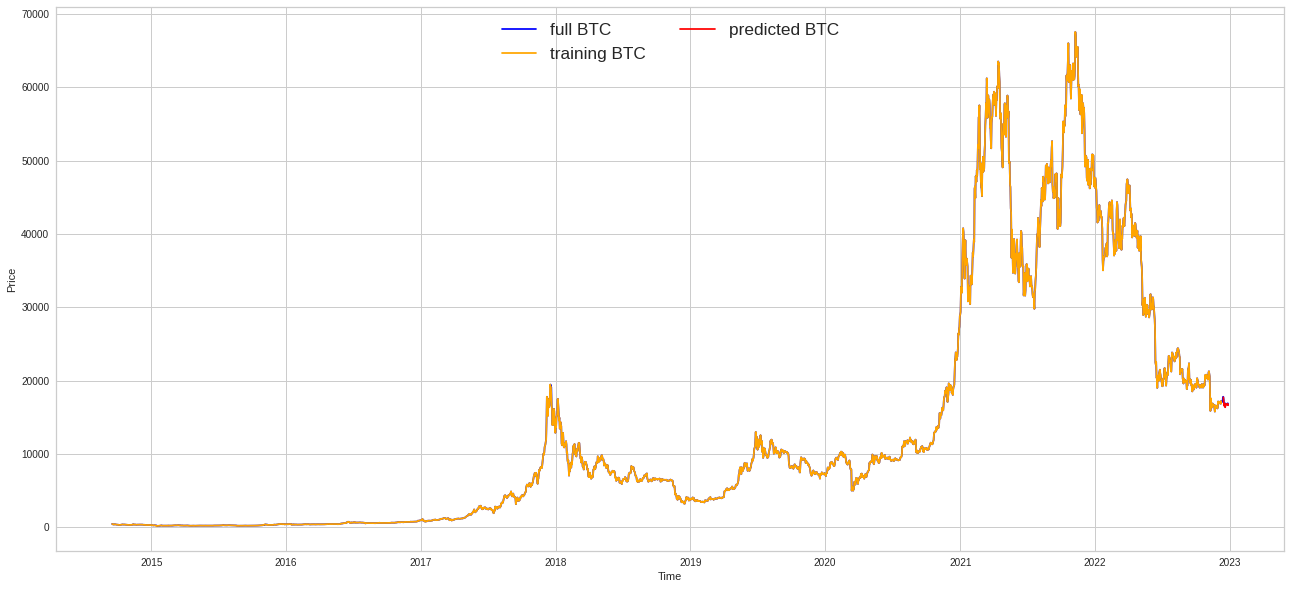

In [ ]:
import matplotlib.pyplot as plt

time_frame = pd.to_datetime(data_plot.index)
price_full = data_plot['BTCUSDT_x']
price_train = data_plot['BTCUSDT_y']
price_pred = data_plot['Predicted Price']


# Set up the subplot
fig, ax = plt.subplots(figsize=(22,10))

# Plot the data
ax.plot(time_frame, price_full, label="full BTC", color='blue')
ax.plot(time_frame, price_train, label="training BTC", color='orange')
ax.plot(time_frame, price_pred, label="predicted BTC", color='red')

# Add a legend
ax.legend(frameon=False, loc='upper center', ncol=2, shadow=True, fontsize='x-large')

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Price")

# Show the plot
plt.show()

#plt.savefig('Bitcoin3.png')

# sklearn

In [19]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')
local_path = '/content/gdrive/MyDrive/Colab Notebooks/AI_ML/'

csv = [
    'Dec_20_2022.csv','Dec_21_2022.csv', 'Dec_21_2022_2.csv', 'Dec_22_2022.csv',
    'Dec_23_2022.csv', 'Dec_24_2022.csv' , 'Dec_30_2022.csv', 'Jan_01_2023.csv', 
    'Jan_02_2023.csv', 'Jan_03_2023.csv', 'Jan_04_2023.csv',  'Jan_07_2023.csv', 
    'Jan_08_2023.csv', 'Jan_09_2023.csv', 'Jan_10_2023.csv', 'Jan_11_2023.csv',
    'Jan_12_2023.csv', 'Jan_13_2023.csv'
]

train_data = pd.DataFrame()
rows = 15
for c in csv:
  if c == csv[0]:
    df = pd.read_csv(local_path + c)
    del df['Unnamed: 0']
    df=df.set_index('Time')
    df['Future_BTCUSDT'] = df['BTCUSDT'].shift(rows)
    train_data = df.tail(-rows)
  else: 
    df = pd.read_csv(local_path + c)
    del df['Unnamed: 0']
    df=df.set_index('Time')
    df['Future_BTCUSDT'] = df['BTCUSDT'].shift(rows)
    df = df.tail(-rows)
    train_data = train_data.append(df)

train_data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,BTCUSDT,Future_BTCUSDT
Time,,
2022-12-20 20:33:16.883893,16901.093646,16900.943150
2022-12-20 20:33:21.985811,16899.552314,16900.943150
2022-12-20 20:33:27.114126,16899.552314,16900.928241
2022-12-20 20:33:32.218467,16899.529399,16901.062385
2022-12-20 20:33:37.383350,16898.910397,16900.889006
...,...,...
2023-01-13 22:49:48.356283,19856.186867,19924.478991
2023-01-13 22:49:53.413953,19856.186867,19922.045202
2023-01-13 22:49:58.467613,19856.114205,19914.151214


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# splitting the data into training and testing sets
X = train_data["BTCUSDT"].values.reshape(-1,1) # reshaping into np.array for sklearn
y = train_data["Future_BTCUSDT"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% train, 20% test

# linear regression model LR
LR = LinearRegression()

# training on training data (fitting)
LR.fit(X_train, y_train)

# predictions on test data
y_pred = LR.predict(X_test)

accuracy = LR.score(X_test, y_test)
print(f"Accuracy: %.10f %s" %((accuracy*100),'%'))

# predicting a single value
LR.predict(np.array(24029.2395).reshape(-1,1))

Accuracy: 99.9881233366 %


array([24020.98480945])

In [21]:
import pickle

# open file in binary mode and write LR model to it
with open('BTC_LM.pkl', 'wb') as _file:
    pickle.dump(LR, _file)

# automatically saving to drive
!cp BTC_LM.pkl "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTC_LM.pkl"

# reading the saved .pkl file in binary mode
with open('BTC_LM.pkl', 'rb') as pkl_file:
    LR = pickle.load(pkl_file)


print(LR.intercept_)
print(LR.coef_)

19.154684281551454
[0.99885933]


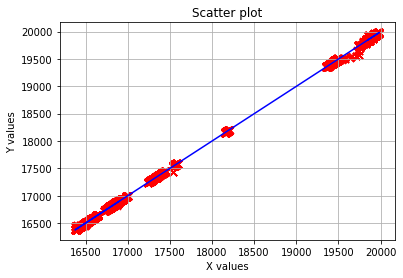

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = train_data['BTCUSDT']
y = train_data['Future_BTCUSDT']

#plt.scatter(x, y)
#plt.scatter(x, y, s=50, c='r', marker='x')

#plt.show()

plt.scatter(x, y, s=50, c='red', marker='x')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter plot')
plt.grid(True)


coefs = np.polyfit(x, y, 1)
poly = np.poly1d(coefs)

# regression line
plt.plot(x, poly(x), 'blue')
plt.show()

plt.show()



In [23]:
import statistics as stat
#stat.correlation(x,y)
corr = train_data["BTCUSDT"].corr(train_data["Future_BTCUSDT"])
corr**2

0.9998979357614332

# NN

In [24]:
# requires feature engineering!!!
# least loss at epoch 2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense



# split data into input (x) and output (y) variables
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create a sequential model
NN = Sequential()

# add a dense layer with 128 neurons and input shape
NN.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu'))

# add an output layer with 1 neuron
NN.add(Dense(1))

# compile the model
NN.compile(loss='mean_squared_error', optimizer='adam')

# train the model
NN.fit(x_train, y_train, epochs=50, batch_size=32)

# evaluate the model
score = NN.evaluate(x_test, y_test)
print("Test loss:", score)


Epoch 1/50
1565/1565 [==============================] - 5s 3ms/step - loss: 2495053.0000
Epoch 2/50
 810/1565 [==============>...............] - ETA: 3s - loss: 29.5379

KeyboardInterrupt: ignored

In [ ]:
NN.predict(pd.Series(17384.339485))

1/1 [==============================] - 0s 321ms/step


array([[17383.459]], dtype=float32)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your data
data = train_data['BTCUSDT']

# Create a sliding window of size 5 ... predict price based on last 5 observations
window_size = 15
X = []
y = []
for i in range(len(data)-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Test the model
score = model.score(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

print(score)

0.9999967496783255


# LSTM


In [ ]:
# enable GPU !!!!!!!
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# load the dataframe and split it into train and test sets
X = train_data['BTCUSDT'].values
y = train_data['Future_BTCUSDT'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))

# create the LSTM model
_LSTM = Sequential()
_LSTM.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
_LSTM.add(Dense(1))
_LSTM.compile(loss='mean_squared_error', optimizer='adam')

# fit the model to the training data
_LSTM.fit(X_train, y_train, epochs=1900, batch_size=64, verbose=2)

# make predictions on the test data
y_pred = _LSTM.predict(X_test)


In [28]:
import pickle

# open file in binary mode and write LR model to it
with open('BTC_LSTM.pkl', 'wb') as _file:
    pickle.dump(_LSTM, _file)

# automatically saving to drive
!cp BTC_LSTM.pkl "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTC_LSTM.pkl"

# reading the saved .pkl file in binary mode
with open('BTC_LSTM.pkl', 'rb') as pkl_file:
    LR = pickle.load(pkl_file)


In [34]:
y_pred = _LSTM.predict(X_test)
y_pred

1761/1761 [==============================] - 3s 2ms/step


array([[2310.6724],
       [2310.6724],
       [2310.6724],
       ...,
       [2310.6724],
       [2310.6724],
       [2310.6724]], dtype=float32)

In [40]:
_LSTM.predict(np.array(24029.2395).reshape(-1,1))
#X_train

InvalidArgumentError: ignored